In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

In [63]:
df=pd.read_csv("C:/Users/athul/Downloads/student_prediction.csv")

In [22]:
df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [23]:
df.isnull().sum()

STUDENTID        0
AGE              0
GENDER           0
HS_TYPE          0
SCHOLARSHIP      0
WORK             0
ACTIVITY         0
PARTNER          0
SALARY           0
TRANSPORT        0
LIVING           0
MOTHER_EDU       0
FATHER_EDU       0
#_SIBLINGS       0
KIDS             0
MOTHER_JOB       0
FATHER_JOB       0
STUDY_HRS        0
READ_FREQ        0
READ_FREQ_SCI    0
ATTEND_DEPT      0
IMPACT           0
ATTEND           0
PREP_STUDY       0
PREP_EXAM        0
NOTES            0
LISTENS          0
LIKES_DISCUSS    0
CLASSROOM        0
CUML_GPA         0
EXP_GPA          0
COURSE ID        0
GRADE            0
dtype: int64

In [24]:
df['GRADE'].unique()

array([1, 2, 5, 0, 3, 4, 7, 6], dtype=int64)

In [25]:
for i in df.columns:
    print(f'{i} : {df[i].unique()}')

STUDENTID : ['STUDENT1' 'STUDENT2' 'STUDENT3' 'STUDENT4' 'STUDENT5' 'STUDENT6'
 'STUDENT7' 'STUDENT8' 'STUDENT9' 'STUDENT10' 'STUDENT11' 'STUDENT12'
 'STUDENT13' 'STUDENT14' 'STUDENT15' 'STUDENT16' 'STUDENT17' 'STUDENT18'
 'STUDENT19' 'STUDENT20' 'STUDENT21' 'STUDENT22' 'STUDENT23' 'STUDENT24'
 'STUDENT25' 'STUDENT26' 'STUDENT27' 'STUDENT28' 'STUDENT29' 'STUDENT30'
 'STUDENT31' 'STUDENT32' 'STUDENT33' 'STUDENT34' 'STUDENT35' 'STUDENT36'
 'STUDENT37' 'STUDENT38' 'STUDENT39' 'STUDENT40' 'STUDENT41' 'STUDENT42'
 'STUDENT43' 'STUDENT44' 'STUDENT45' 'STUDENT46' 'STUDENT47' 'STUDENT48'
 'STUDENT49' 'STUDENT50' 'STUDENT51' 'STUDENT52' 'STUDENT53' 'STUDENT54'
 'STUDENT55' 'STUDENT56' 'STUDENT57' 'STUDENT58' 'STUDENT59' 'STUDENT60'
 'STUDENT61' 'STUDENT62' 'STUDENT63' 'STUDENT64' 'STUDENT65' 'STUDENT66'
 'STUDENT67' 'STUDENT68' 'STUDENT69' 'STUDENT70' 'STUDENT71' 'STUDENT72'
 'STUDENT73' 'STUDENT74' 'STUDENT75' 'STUDENT76' 'STUDENT77' 'STUDENT78'
 'STUDENT79' 'STUDENT80' 'STUDENT81' 'STUDENT82'

In [26]:
df['GRADE'].mean()

3.2275862068965515

In [27]:
df['GRADE'].max()

7

In [28]:
df['GRADE'].min()

0

In [14]:
df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [51]:
dict1={0:'A+',1:'A',2:'B+',3:'B',4:'C+',5:'C',6:'D+',7:'D'}
df['GRADE']=df['GRADE'].apply(lambda X: dict1[X] if X in dict1 else X)

In [52]:
df["GRADE"]

0       A
1       A
2       A
3       A
4       A
       ..
140     C
141     C
142     A
143    C+
144     B
Name: GRADE, Length: 145, dtype: object

In [54]:
df.drop('COURSE ID',axis=1,inplace=True)

In [55]:
df

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,1,3,2,1,2,1,1,A
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,1,3,2,3,2,2,3,A
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,1,2,2,1,1,2,2,A
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,1,2,3,2,2,1,3,2,A
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,2,1,2,2,2,1,2,2,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,1,2,1,2,1,3,3,C
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,2,1,1,3,2,2,1,5,3,C
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,1,3,3,2,1,4,3,A
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,1,2,1,2,1,2,1,5,3,C+


In [26]:
# df.drop(['TRANSPORT','ACTIVITY','SALARY','PARTNER','COURSE ID'],axis=1,inplace=True)

In [72]:
X = df[['PREP_STUDY','PREP_EXAM','CLASSROOM','CUML_GPA','EXP_GPA']]

In [88]:
X.nunique()

PREP_STUDY    3
PREP_EXAM     3
CLASSROOM     3
CUML_GPA      5
EXP_GPA       4
dtype: int64

In [92]:
X

,PREP_STUDY,PREP_EXAM,CLASSROOM,CUML_GPA,EXP_GPA
0,1,1,2,1,1
1,1,1,2,2,3
2,1,1,1,2,2
3,1,2,1,3,2
4,2,1,1,2,2
...,...,...,...,...,...
140,1,1,1,3,3
141,1,1,1,5,3
142,1,1,1,4,3
143,2,1,1,5,3


In [78]:
Y = df['GRADE']

In [79]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
140    5
141    5
142    1
143    4
144    3
Name: GRADE, Length: 145, dtype: int64

In [97]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [98]:
X_train

,PREP_STUDY,PREP_EXAM,CLASSROOM,CUML_GPA,EXP_GPA
65,2,1,1,2,2
28,1,1,3,5,4
40,1,1,1,2,3
85,1,1,3,4,3
24,1,1,2,4,4
...,...,...,...,...,...
71,1,1,3,2,2
106,3,2,1,4,4
14,1,1,1,4,4
92,1,1,3,2,2


In [99]:
X_test

,PREP_STUDY,PREP_EXAM,CLASSROOM,CUML_GPA,EXP_GPA
69,2,1,1,3,2
140,1,1,1,3,3
27,1,1,1,2,1
19,1,1,3,2,3
42,1,1,1,2,3
117,1,1,1,2,3
126,2,1,1,2,2
108,1,1,2,3,3
84,3,3,3,5,4
18,1,1,3,3,3


In [100]:
dt=DecisionTreeClassifier()

In [101]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [102]:
Y_pred=dt.predict(X_test)

In [103]:
Y_pred

array([2, 6, 1, 2, 1, 1, 2, 6, 5, 1, 1, 5, 1, 1, 3, 1, 6, 3, 6, 1, 3, 2,
       1, 3, 1, 1, 6, 7, 1, 3, 2, 1, 1, 1, 1, 3, 5, 1, 1, 2, 1, 6, 3, 3],
      dtype=int64)

In [104]:
accuracy_score(Y_pred,Y_test)

0.25

In [105]:
rf=RandomForestClassifier()

In [106]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [107]:
Y_pred=rf.predict(X_test)

In [108]:
Y_pred

array([2, 1, 1, 1, 1, 1, 2, 6, 5, 1, 1, 5, 1, 7, 4, 1, 6, 3, 1, 1, 3, 2,
       7, 3, 4, 5, 1, 7, 4, 3, 2, 1, 2, 1, 4, 3, 7, 1, 7, 2, 1, 1, 3, 3],
      dtype=int64)

In [109]:
accuracy_score(Y_pred,Y_test)

0.13636363636363635

In [136]:
sv=svm.SVC(kernel="linear")
# sv=svm.SVC(kernel="rbf")
# sv=svm.SVC(kernel="poly")

In [132]:
sv.fit(X_train,Y_train)

SVC(kernel='linear')

In [133]:
Y_pred=sv.predict(X_test)

In [134]:
Y_pred

array([2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 5, 5, 5, 5, 1, 1, 5, 2,
       3, 5, 5, 5, 1, 7, 5, 1, 2, 1, 7, 1, 5, 1, 3, 1, 1, 2, 1, 1, 1, 1],
      dtype=int64)

In [135]:
accuracy_score(Y_pred,Y_test)

0.18181818181818182

In [29]:
# df.drop(['#_SIBLINGS','GENDER','AGE'],axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   HS_TYPE        145 non-null    int64
 1   SCHOLARSHIP    145 non-null    int64
 2   LIVING         145 non-null    int64
 3   MOTHER_EDU     145 non-null    int64
 4   FATHER_EDU     145 non-null    int64
 5   STUDY_HRS      145 non-null    int64
 6   READ_FREQ      145 non-null    int64
 7   READ_FREQ_SCI  145 non-null    int64
 8   ATTEND_DEPT    145 non-null    int64
 9   IMPACT         145 non-null    int64
 10  ATTEND         145 non-null    int64
 11  PREP_STUDY     145 non-null    int64
 12  PREP_EXAM      145 non-null    int64
 13  NOTES          145 non-null    int64
 14  LISTENS        145 non-null    int64
 15  LIKES_DISCUSS  145 non-null    int64
 16  CLASSROOM      145 non-null    int64
 17  CUML_GPA       145 non-null    int64
 18  EXP_GPA        145 non-null    int64
 19  GRADE   

In [32]:
df.drop(['HS_TYPE','LIVING','SCHOLARSHIP','IMPACT',''],axis=1,inplace=True)

Index(['HS_TYPE', 'SCHOLARSHIP', 'LIVING', 'MOTHER_EDU', 'FATHER_EDU',
       'STUDY_HRS', 'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT',
       'ATTEND', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS',
       'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA', 'GRADE'],
      dtype='object')

In [33]:
X=df.drop(['GRADE'],axis=1)

In [34]:
X

,HS_TYPE,SCHOLARSHIP,LIVING,MOTHER_EDU,FATHER_EDU,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA
0,3,3,1,1,2,3,2,2,1,1,1,1,1,3,2,1,2,1,1
1,3,3,1,2,3,2,2,2,1,1,1,1,1,3,2,3,2,2,3
2,2,3,2,2,2,2,1,2,1,1,1,1,1,2,2,1,1,2,2
3,1,3,2,1,2,3,1,2,1,1,1,1,2,3,2,2,1,3,2
4,1,3,4,3,3,2,1,1,1,1,1,2,1,2,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,3,2,1,2,3,3,2,1,1,1,1,1,2,1,2,1,3,3
141,2,4,2,1,1,3,2,2,2,1,2,1,1,3,2,2,1,5,3
142,1,4,1,3,4,2,2,2,1,1,1,1,1,3,3,2,1,4,3
143,2,4,3,4,4,2,2,1,1,1,1,2,1,2,1,2,1,5,3


In [35]:
Y=df['GRADE']

In [36]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
140    5
141    5
142    1
143    4
144    3
Name: GRADE, Length: 145, dtype: int64

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=43)

In [38]:
X_train

,HS_TYPE,SCHOLARSHIP,LIVING,MOTHER_EDU,FATHER_EDU,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA
137,1,5,1,2,2,2,2,2,1,1,1,1,1,3,1,3,1,2,4
20,2,5,2,3,3,4,2,2,2,1,1,1,2,3,1,2,3,4,4
96,2,4,3,2,2,2,3,2,1,1,1,1,1,3,2,3,2,2,3
80,2,3,1,1,1,1,1,1,1,3,1,1,1,2,3,1,2,4,2
43,2,3,1,2,3,2,2,2,1,1,2,1,1,3,1,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2,3,1,1,3,3,2,2,1,1,1,1,1,3,2,2,2,5,4
21,2,5,2,2,2,3,2,2,1,1,1,1,1,3,1,3,3,3,3
49,1,4,1,2,3,2,2,2,1,1,1,2,1,2,2,2,1,3,2
64,3,5,1,2,2,1,2,2,1,3,1,2,1,3,2,3,1,4,3


In [39]:
X_test

,HS_TYPE,SCHOLARSHIP,LIVING,MOTHER_EDU,FATHER_EDU,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA
45,2,3,1,2,3,3,2,2,1,1,1,1,1,2,2,2,1,4,3
50,2,3,1,1,1,2,2,2,1,1,2,1,1,2,2,2,3,3,3
97,2,4,3,3,3,2,2,2,1,1,1,1,1,3,2,2,1,3,3
135,2,3,2,3,3,2,3,2,1,3,1,1,1,3,3,2,1,3,2
62,2,3,2,2,3,3,2,2,1,1,1,1,1,2,3,3,2,5,4
126,1,4,3,4,6,4,2,3,1,1,1,2,1,3,3,3,1,2,2
100,2,4,3,4,1,2,2,2,1,1,1,1,1,2,2,2,1,3,3
103,1,4,2,1,3,2,3,2,1,1,1,1,1,2,2,3,2,4,4
57,2,3,1,4,2,2,3,2,1,1,1,1,1,3,2,3,1,5,4
37,2,3,3,3,3,2,2,2,1,1,1,1,1,3,2,3,3,5,4


In [40]:
lr=LogisticRegression()

In [41]:
lr.fit(X_train,Y_train)

C:\Users\athul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
Y_pred=lr.predict(X_test)

In [43]:
Y_pred

array([5, 5, 1, 1, 3, 7, 2, 7, 7, 3, 3, 7, 3, 5, 3, 3, 7, 7, 3, 2, 1, 3,
       1, 3, 1, 1, 1, 3, 1, 6, 2, 1, 3, 1, 7, 1, 7, 5, 1, 2, 2, 2, 3, 1],
      dtype=int64)

In [44]:
accuracy_score(Y_test,Y_pred)

0.1590909090909091

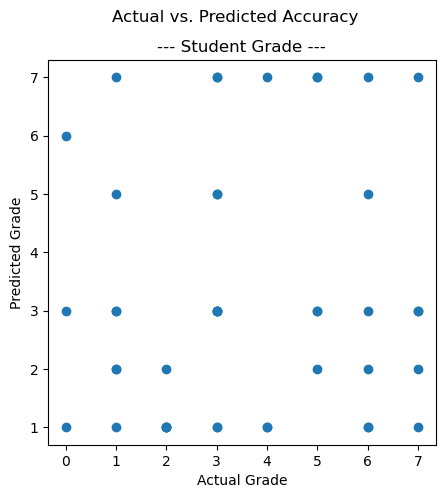

In [89]:
plt.figure(figsize=(5,5))
plt.scatter(Y_test,Y_pred,)
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.suptitle('Actual vs. Predicted Accuracy')
plt.title('--- Student Grade ---')
plt.show()

In [91]:
df.head()

,HS_TYPE,SCHOLARSHIP,LIVING,MOTHER_EDU,FATHER_EDU,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,GRADE
0,3,3,1,1,2,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1
1,3,3,1,2,3,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1
2,2,3,2,2,2,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1
3,1,3,2,1,2,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1
4,1,3,4,3,3,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1


In [92]:
df.tail()

,HS_TYPE,SCHOLARSHIP,LIVING,MOTHER_EDU,FATHER_EDU,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,GRADE
140,2,3,2,1,2,3,3,2,1,1,1,1,1,2,1,2,1,3,3,5
141,2,4,2,1,1,3,2,2,2,1,2,1,1,3,2,2,1,5,3,5
142,1,4,1,3,4,2,2,2,1,1,1,1,1,3,3,2,1,4,3,1
143,2,4,3,4,4,2,2,1,1,1,1,2,1,2,1,2,1,5,3,4
144,1,5,1,3,1,3,1,1,1,1,1,2,1,3,2,3,1,5,4,3
